In [1]:
import pandas as pd

In [5]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [6]:
#Distribution

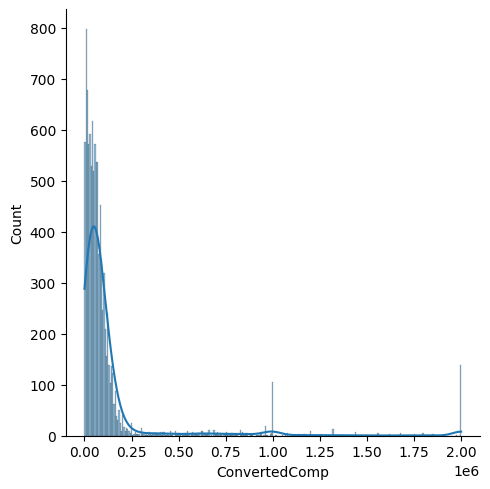

In [8]:
import seaborn as sns
sns.displot(df['ConvertedComp'], kde=True)

(array([9659.,  238.,  115.,  125.,   99.,  131.,   34.,   15.,   15.,
         151.]),
 array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000., 1800000., 2000000.]),
 <BarContainer object of 10 artists>)

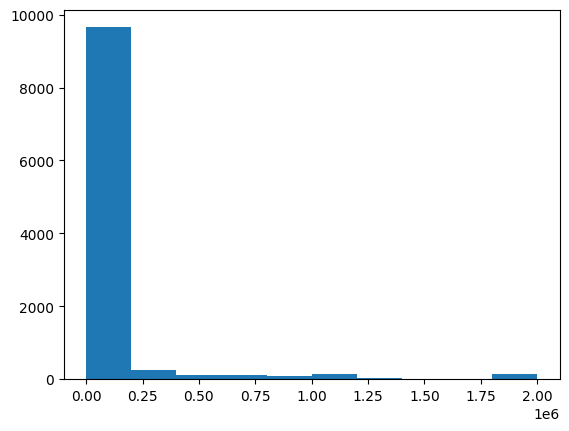

In [9]:
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(df['ConvertedComp'])

In [10]:
df['ConvertedComp'].dropna(axis=0, inplace=True)
print("convertedComp Median: ", df['ConvertedComp'].median())

convertedComp Median:  57745.0


In [11]:
df["Gender"].value_counts()["Man"]

10480

In [12]:
df_woman=df[df['Gender'] == 'Woman']
print('Woman Median: ', df_woman['ConvertedComp'].median())

Woman Median:  57708.0


In [13]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

(array([2.094e+03, 5.337e+03, 2.557e+03, 8.420e+02, 2.250e+02, 4.900e+01,
        6.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([16. , 24.3, 32.6, 40.9, 49.2, 57.5, 65.8, 74.1, 82.4, 90.7, 99. ]),
 <BarContainer object of 10 artists>)

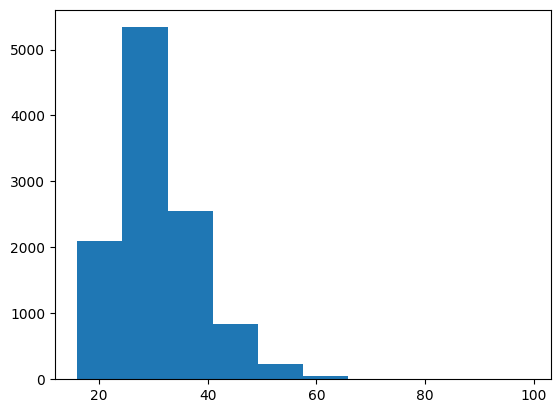

In [14]:
plt.hist(df['Age'])

In [15]:
#Outliers

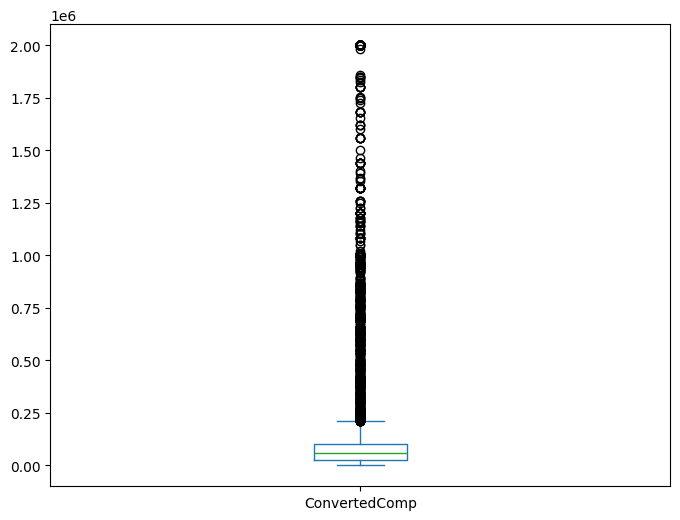

In [16]:
df_cv = pd.DataFrame(data=df["ConvertedComp"])
df_cv.plot(kind='box', figsize=(8, 6))
plt.show()

In [17]:
df['ConvertedComp'].dropna(axis=0, inplace=True)
Q1, Q3 = df['ConvertedComp'].quantile(.25), df['ConvertedComp'].quantile(.75)
IQR = Q3 - Q1
print('The Inter Quartile Range for ConvertedComp: ', IQR)

The Inter Quartile Range for ConvertedComp:  73132.0


In [18]:
upper=Q3+(IQR*1.5)
lower=Q1-(IQR*1.5)

print('Upper bound: ', upper)
print('Lower bound: ', lower)

Upper bound:  209698.0
Lower bound:  -82830.0


In [20]:
(df['ConvertedComp'] < lower) | (df['ConvertedComp'] > upper)

0        False
1        False
2        False
3         True
4        False
         ...  
11393    False
11394    False
11395    False
11396    False
11397    False
Name: ConvertedComp, Length: 11398, dtype: bool

In [21]:
df2 = df['ConvertedComp'].clip(upper, lower)
df2.describe()

count     10582.000000
mean      72327.661406
std       58619.926538
min           0.000000
25%       26868.000000
50%       57745.000000
75%      100000.000000
max      209698.000000
Name: ConvertedComp, dtype: float64